# R waarde
https://data.rivm.nl/covid-19/COVID-19_reproductiegetal.json


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

import cufflinks as cf
from IPython.display import display,HTML

cf.set_config_file(sharing='public',theme='ggplot',offline=True)

df = pd.read_json("https://data.rivm.nl/covid-19/COVID-19_reproductiegetal.json")
df

,Date,Rt_low,Rt_avg,Rt_up,population,version
0,2020-02-17,0.50,1.93,4.00,hosp,1
1,2020-02-18,0.00,1.74,4.00,hosp,1
2,2020-02-19,0.50,1.59,2.83,hosp,1
3,2020-02-20,0.83,1.74,2.83,hosp,1
4,2020-02-21,0.67,2.03,3.67,hosp,1
...,...,...,...,...,...,...
643,2021-11-21,0.98,NaN,1.04,testpos,1
644,2021-11-22,0.98,NaN,1.06,testpos,1
645,2021-11-23,0.98,NaN,1.09,testpos,1
646,2021-11-24,0.98,NaN,1.11,testpos,1


In [2]:
df.head()

,Date,Rt_low,Rt_avg,Rt_up,population,version
0,2020-02-17,0.50,1.93,4.00,hosp,1
1,2020-02-18,0.00,1.74,4.00,hosp,1
2,2020-02-19,0.50,1.59,2.83,hosp,1
3,2020-02-20,0.83,1.74,2.83,hosp,1
4,2020-02-21,0.67,2.03,3.67,hosp,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        648 non-null    datetime64[ns]
 1   Rt_low      648 non-null    float64       
 2   Rt_avg      634 non-null    float64       
 3   Rt_up       648 non-null    float64       
 4   population  648 non-null    object        
 5   version     648 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 30.5+ KB


In [4]:
df.describe()

,Rt_low,Rt_avg,Rt_up,version
count,648.000000,634.000000,648.000000,648.0
mean,0.932917,1.056735,1.205664,1.0
std,0.336626,0.307133,0.488606,0.0
min,0.000000,0.480000,0.720000,1.0
25%,0.817500,0.880000,0.960000,1.0
50%,0.950000,0.995000,1.065000,1.0
75%,1.110000,1.170000,1.260000,1.0
max,2.930000,3.010000,5.000000,1.0


In [5]:
df["Rt_avg"].mean()

1.0567350157728705

In [6]:
df['month_year'] = df['Date'].dt.to_period('M')
df.head()

,Date,Rt_low,Rt_avg,Rt_up,population,version,month_year
0,2020-02-17,0.50,1.93,4.00,hosp,1,2020-02
1,2020-02-18,0.00,1.74,4.00,hosp,1,2020-02
2,2020-02-19,0.50,1.59,2.83,hosp,1,2020-02
3,2020-02-20,0.83,1.74,2.83,hosp,1,2020-02
4,2020-02-21,0.67,2.03,3.67,hosp,1,2020-02


In [7]:
df.groupby(["Date"]).mean().iplot()

In [15]:
df.groupby(["month_year"]).mean().iplot()

In [9]:
# df21 = df[df["Date"] > "2021-01-01"]
df21 = df.loc[df["Date"] > "2021-01-01", ["Date","Rt_low","Rt_avg","Rt_up"]]
df21.head()

,Date,Rt_low,Rt_avg,Rt_up
320,2021-01-02,0.91,0.94,0.96
321,2021-01-03,0.86,0.88,0.90
322,2021-01-04,0.82,0.84,0.86
323,2021-01-05,0.81,0.84,0.86
324,2021-01-06,0.83,0.85,0.88


In [10]:
df21.set_index("Date",drop=True,inplace=True)
df21.head()

,Rt_low,Rt_avg,Rt_up
Date,,,
2021-01-02,0.91,0.94,0.96
2021-01-03,0.86,0.88,0.90
2021-01-04,0.82,0.84,0.86
2021-01-05,0.81,0.84,0.86
2021-01-06,0.83,0.85,0.88


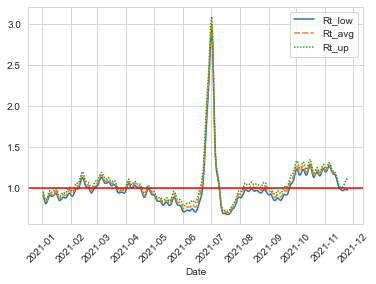

In [11]:
# import matplotlib.dates as mdates

sns.lineplot(data=df21)
#fig.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.axhline(y=1.0, color='r', linestyle='-')
plt.xticks(rotation=45)
plt.show()

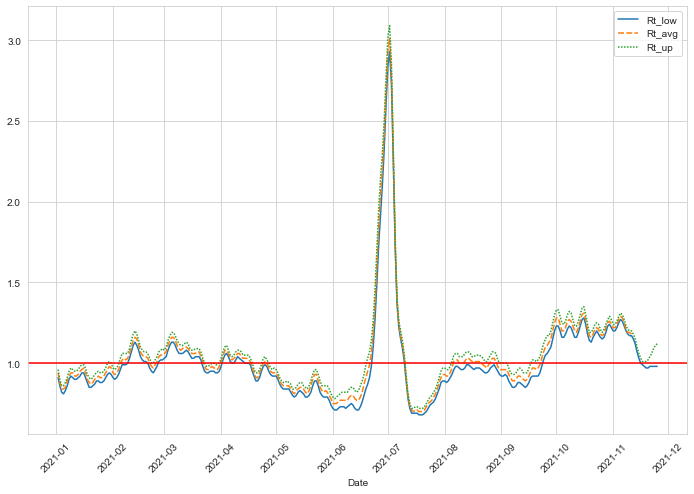

In [12]:
def cm2inch(value):
    return value/2.54

plt.figure(figsize=(cm2inch(30), cm2inch(20)))
sns.lineplot(data=df21)
plt.axhline(y=1.0, color='r', linestyle='-')
plt.xticks(rotation=45)
plt.show()


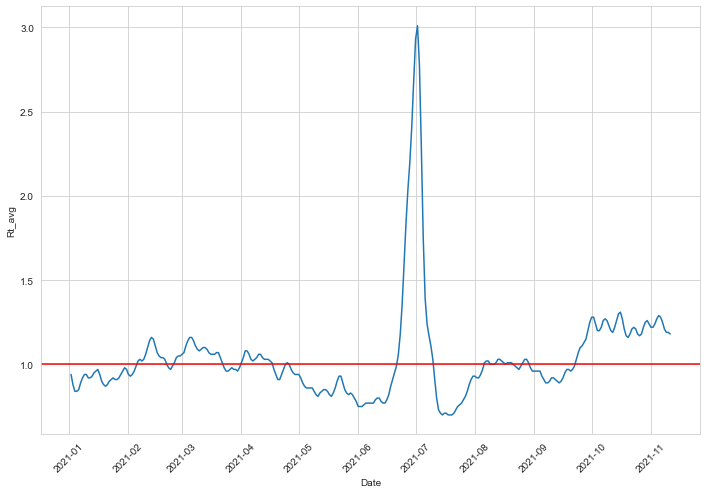

In [13]:
def cm2inch(value):
    return value/2.54

plt.figure(figsize=(cm2inch(30), cm2inch(20)))
sns.lineplot(data=df21["Rt_avg"])
plt.axhline(y=1.0, color='r', linestyle='-')
plt.xticks(rotation=45)
plt.show()
